# The correlation between sustainable energy and emissions

<script>
$$(document).ready(function(){
    $$('.cell.tag_hide_input .input').hide();
    $$('.cell.tag_hide_input').click(function(){
        $$(this).find('.input').toggle();
    });
});
function switchMap(mapId) {
    // Hide all maps
    document.querySelectorAll('.map-container').forEach(function(map) {
        map.style.display = 'none';
    });

    // Show the selected map
    document.getElementById(mapId).style.display = 'flex';
}
</script>

In [25]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [26]:
#px.bar(df.where(df['Area'] == 'World' ),x = 'Area', y = '2000')
df: pd.DataFrame = pd.read_csv('../datasets/emissions.csv')
where = df.where((df['Area'] == 'World') & (df['Element'] == 'Emissions (CO2)') &  (df['Item'] == 'Energy')).dropna().transpose()[4:].reset_index().rename(columns={'index': 'Year', 50837: 'Emissions'})
fig = px.line(where, x='Year', y='Emissions')
fig.update_layout(title='CO2 Emissions worldwide from 2000 to 2020', xaxis_title='Year', yaxis_title='CO2 Emissions (in Kilotonnes)')
fig.show()

> *Figure 1: Shows the total CO2 emissions of the entire world from 2000 to 2020.*


Global warming has become one of the most urgent issues of our time, and CO2 is one of the largest contributors of this problem. Over the past two years there has been a notable increase in CO2 emissions.  The graph above represents the emissions of CO2 over the years 2000 till 2020, indicating the worrying increase of CO2 emissions and only a small decrease of emissions towards 2020. This underlines the immediate need to implement sustainability to reduce carbon footprints. But is sustainability really that helpful? 

In this datastory we will be looking at two different aspects, regarding the correlation between emissions and sustainability. We will be comparing the emissions and sustainability of different countries, and how they have changed over the years. This way we can see the significance sustainability has had on global warming.

<div class="scrollable-container">

In [28]:
# Sort by 'total_CO' (or any other initial sort criteria) and select the top 10
merge = pd.read_csv('../graphs/graphA/merge.csv')
years = ['2000', '2010', '2015', '2020']
# LULUCF filter:
# Removes all rows with 'All sectors with LULUCF' in the 'Item' column
merge = merge[merge['Item'] != 'All sectors with LULUCF']

# Calculate the average of the relative values for each country
merge['avg_total'] = merge[[year for year in years]].mean(axis=1)

# Sort by the average
total_sort = merge.sort_values('avg_total', ascending=False)

# Create a new Figure
fig = go.Figure()

for year in years:
    fig.add_trace(go.Bar(
        x=total_sort['Area'],
        y=total_sort[year],
        name=year,
        width=0.2,
    ))


# Change the bar mode to group
fig.update_layout(barmode='group')

# Add labels and title
fig.update_layout(
    title='Emissions per Country for Selected Categories',
    xaxis_title='',
    yaxis_title=''
)

# Define dropdown menus for switching categories
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="CO2 Emissions (in kilotons)",
                     method="update",
                     args=[{"y": [total_sort[year] for year in years]}]),
                dict(label="CO2 Emissions per Area (in kilotons per km²)",
                     method="update",
                     args=[{"y": [total_sort[year+'/area'] for year in years]}]),
                dict(label="CO2 Emissions per Capita (in kilotons per person)",
                     method="update",
                     args=[{"y": [total_sort[year+'/pop'] for year in years]}])
            ],
            direction="up",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0,
            xanchor="left",
            y=-0.8,
            yanchor="bottom"
        ),
    ],
    width=6000,
    bargroupgap=1,
    legend=dict(x=-0.02, y=1, xanchor='left', yanchor='top'),
)

# Show the plot
fig.show()

</div>

> *Figure 2: Shows the CO2 emissions per country, in total, per km² and per person.*

When you look at the total CO2 emissions per country, China comes out on top by a very large margin. In fact, looking at the years before 2020, we can notice a steep increase in emissions. This is a prime example of countries that seem to not take any action towards combatting the issue of global warming and the increase of emissions. When we divide the total CO2 emissions by each country's surface area to get the emissions/km², we can see a totally different distribution. Singapore is the highest, which is to be expected. Singapore is a very small country, filled with large skyscrapers and dense infrastructure. The most interesting graph however, is when we look at CO2 emissions per Capita. We can see that this distrubution of emissions per country is the most evenly distributed, with Qatar at the highest emissions/capita in 2000. Luckily, most countries in this visualization show a gradual decrease in emissions/capita.


In [45]:
df = pd.read_csv('../datasets/sus.csv')

df = df[df["Year"] == 2020]

# Top 10 countries most renewable energy
df_sorted = df.sort_values('Electricity from renewables (TWh)', ascending=False)
df_top10 = df_sorted.head(10)

trace1 = go.Bar(
    x = df_top10['Entity'],
    y = df_top10['Electricity from fossil fuels (TWh)'],
    name='Fossil Fuels',
    text = df_top10['Electricity from fossil fuels (TWh)'],
)

trace2 = go.Bar(
    x = df_top10['Entity'],
    y = df_top10['Electricity from nuclear (TWh)'],
    name='Nuclear',
    text = df_top10['Electricity from nuclear (TWh)'],
)

trace3 = go.Bar(
    x = df_top10['Entity'],
    y = df_top10['Electricity from renewables (TWh)'],
    name='Renewables',
    text = df_top10['Electricity from renewables (TWh)'],
)

fig = go.Figure(data=[trace1, trace2, trace3], layout=go.Layout(barmode='stack', font_size = 14,
                                                                title= "Top 10 countries with most electricity gained from renewables")).show()


> *Figure 3: Electricity obtained from renewables, nuclear and fossil fuels from the 10 countries with most electricity gained from fossil fuels in 2020.*

Figure 2 shows that the United States (US) gained almost half their amount of electricity in 2020 through renewables and nuclear sources. These are sustainable sources and figure 2 shows a decrease in emissions from the US, even though it is still the second biggest contributor to world wide CO2 emissions. The decrease in emissions therefore supports our first perspective. Also, Brazil, Canada and Norway show to have almost all their electricity gained from renewable sources. In figure 2 when looking at the emissions per Capatica, Brazil has a relatively low amount of emissions and Norway's and Canada's emissions seem to be reducing. These sustainable sources could be the reason.

On the other hand, the same three countries Brazil, Canada and Norway still have a lot of CO2 emissions according to all the data from figure 2, which backs up our other perspective instead since these countries mostly get their electricity from renewables. China and the United States are by far the biggest contributors to the world wide CO2 emissions, while they do gain electricity through renewables and nuclear, which are sustainable sources. So this argument does not align with our first perspective.

In [46]:
# Top 10 countries most fossil fuels
df_sorted = df.sort_values('Electricity from fossil fuels (TWh)', ascending=False)
df_top10 = df_sorted.head(10)

trace1 = go.Bar(
    x = df_top10['Entity'],
    y = df_top10['Electricity from fossil fuels (TWh)'],
    name='Fossil Fuels',
    text = df_top10['Electricity from fossil fuels (TWh)'],
)

trace2 = go.Bar(
    x = df_top10['Entity'],
    y = df_top10['Electricity from nuclear (TWh)'],
    name='Nuclear',
    text = df_top10['Electricity from nuclear (TWh)'],
)

trace3 = go.Bar(
    x = df_top10['Entity'],
    y = df_top10['Electricity from renewables (TWh)'],
    name='Renewables',
    text = df_top10['Electricity from renewables (TWh)'],
)

fig = go.Figure(data=[trace1, trace2, trace3], layout=go.Layout(barmode='stack', font_size = 14,
                                                                title= "Top 10 countries with most electricity gained from fossil fuels")).show()

> *Figure 4: Electricity obtained from renewables, nuclear and fossil fuels from the 10 countries with most electricity gained from renewables in 2020.*

China seems to have the most electricity gained from fossil fuels in figure 4. These 10 countries also score high on CO2 emissions in figure 2. Fossil fuels is not a sustainable source to obtain electricity, as it adds to the CO2 emissions (Zheng e.a. 2019). Since these countries do not gain their electricity mostly from renewables but from fossil fuels, the data aligns with our first perspective of renewable sources reducing emissions while other sources could have a bad impact on the emissions.

However, China, United States, India, Japan and Germany do show to have gotten about a 25% from total electricity gained from renewables and yet they have a lot of emissions. As mentioned before, for China we can even see that although a large amount of electricity was gained through renewable sources, the emissions 2000-2020 only kept increasing in figure 2. This supports our second perspective of sustainable energy not having a big positive impact on lowering the emissions. 

In [52]:
df = pd.read_parquet("../graphs/small_merge.parquet")
china_data = df[(df['Element'] == "Emissions (CO2)") & (df['Item'] == "All sectors without LULUCF") & (df['Area'] == "China")].drop(columns=[
    'Item', 'Element']).dropna()
china_means = pd.concat([china_data['Renewable energy share in the total final energy consumption (%)'].groupby(china_data['Year']).mean(), china_data['Emission'].groupby(china_data['Year']).sum()], axis=1)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=china_means.index, y=china_means['Emission'], name="China emissions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=china_means.index, y=china_means['Renewable energy share in the total final energy consumption (%)'], name="China renewable energy share (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="China world average"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>China emissions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>China renewable energy share (%)</b>", secondary_y=True)
fig.show()

> This graph shows the sum of emissions in China and the means of renewable energy share over the pas two decades

China has only increased their emissions of CO2 and over the past 19 years. China is a good example of the challenges we face when it comes to industrializing nations. We would need more aggressive measures to combat world pollution. 

In [ ]:
developed_countries = [
    "Australia",
    "Austria",
    "Belgium",
    "Canada",
    "Denmark",
    "Finland",
    "France",
    "Germany",
    "Iceland",
    "Ireland",
    "Israel",
    "Italy",
    "Japan",
    "Luxembourg",
    "Netherlands",
    "New Zealand",
    "Norway",
    "Portugal",
    "Singapore",
    "South Korea",
    "Spain",
    "Sweden",
    "Switzerland",
    "United Kingdom",
    "United States",
    "Andorra",
    "Cyprus",
    "Czech Republic",
    "Estonia",
    "Greece",
    "Hong Kong SAR",
    "Latvia",
    "Lithuania",
    "Malta",
    "Monaco",
    "San Marino",
    "Slovakia",
    "Slovenia"
]


countries = pd.read_csv("../datasets/sus.csv")["Entity"].drop_duplicates()
world_data = df[(df['Element'] == "Emissions (CO2)") & (df['Item'] == "All sectors without LULUCF") & (df['Area'].isin(countries))].drop(columns=[
    'Item', 'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Financial flows to developing countries (US $)',
    'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'Renewables (% equivalent primary energy)', 'gdp_growth',
    'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
    'Longitude']).dropna()
means = pd.concat([world_data['Renewable energy share in the total final energy consumption (%)'].groupby(world_data['Year']).mean(), world_data['Emission'].groupby(world_data['Year']).sum()], axis=1)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=means.index, y=means['Emission'], name="Emissions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=means.index, y=means['Renewable energy share in the total final energy consumption (%)'], name="Renewable energy share (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="World average"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Emissions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Renewable energy share (%)</b>", secondary_y=True)

fig.show()

> This graph shows the sum of emissions worldwide and the means of renewable energy share over the pas two decades

When looking at the world sum of emissions, it has grown since 2000 till 2019 by almost 50%. This increase is mostly caused due to population growth and economic development. In 2020 there is an outstanding decrease in CO2 emissions. Only in this year, there has been a significant increase of sustainability.

Even Though there has been an increase in renewable energy, the emissions were still on the rise for a long time. Renewable energy has not been enough to combat the emissions, until recent years. But this decline of emissions is most likely due to the COVID-19 pandemic. During the pandemic the international trade was slowed down, less demand for power in industries and there was a restriction of public and private transport. So we can predict that the emissions have rebounded to their previous levels after the pandemic. (https://www.sciencedirect.com/science/article/pii/S2352550920314287)

In [ ]:
developed_data = df[(df['Element'] == "Emissions (CO2)") & (df['Item'] == "All sectors without LULUCF") & (df['Area'].isin(developed_countries))].drop(columns=[
    'Item', 'Element'])

developed_means = pd.concat([developed_data['Renewable energy share in the total final energy consumption (%)'].groupby(developed_data['Year']).mean(), developed_data['Emission'].groupby(developed_data['Year']).sum()], axis=1)

developed_means = pd.concat([developed_data['Renewable energy share in the total final energy consumption (%)'].groupby(developed_data['Year']).mean(), developed_data['Emission'].groupby(developed_data['Year']).sum()], axis=1)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=developed_means.index, y=developed_means['Emission'], name="Developed emissions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=developed_means.index, y=developed_means['Renewable energy share in the total final energy consumption (%)'], name="Developed renewable energy share (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Developed world average"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Emissions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Renewable energy share (%)</b>", secondary_y=True)

fig.show()

> This graph shows the sum of emissions in developed countries and the means of renewable energy share over the pas two decades

The emissions in developed countries show that they have been declining over the years. There has also been a steady increase of renewable energy since 2000. 

While the increase does correlate with the reduction of CO2 emissions, the decrease is not sheer.  So even though renewable energy contributes to the reduction of emissions, the pace is not efficient to make big changes. Sustainability helps for the long term, but is too slow to meet urgent changes in reducing CO2 emissions.

In [ ]:
developing_data = df[(df['Element'] == "Emissions (CO2)") & (df['Item'] == "All sectors without LULUCF") & (~df['Area'].isin(developed_countries))].drop(columns=[
    'Item','Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Financial flows to developing countries (US $)',
    'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'Renewables (% equivalent primary energy)', 'gdp_growth',
    'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
    'Longitude']).dropna()

developing_means = pd.concat([developing_data['Renewable energy share in the total final energy consumption (%)'].groupby(developing_data['Year']).mean(), developing_data['Emission'].groupby(developing_data['Year']).sum()], axis=1)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=developing_means.index, y=developing_means['Emission'], name="Developing emissions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=developing_means.index, y=developing_means['Renewable energy share in the total final energy consumption (%)'], name="Developing renewable energy share (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Developing world average"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Emissions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Renewable energy share (%)</b>", secondary_y=True)

fig.show()

> This graph shows the sum of emissions in developing countries and the means of renewable energy share over the pas two decades

The emissions in developing countries have had a steady increase over the years. In 2020 there has been a decrease of emissions, similar to the world sum emissions (previous graph). There as also been an increase of renewable energy in that year. Due to the economic growth in these countries the emissions will only increase, renewable energy is for this reason not enough to combat this issue. 

I conclusion the world becoming more sustainable is not being substantiated according to the graphs. When looking at the world sum of emissions, it has grown since 2000 till 2019 by almost 50%. Even though the emissions from the developed world have reduced it’s emissions, China has increased it’s emissions by almost 196.2%, in the same time period. This increase of emissions done by China offsets the reductions of emissions made by developed countries largely.

You may think that there has been an improvement of sustainability in 2020 looking at the world emissions, but this is most likely due to the pandemic that occurred in that year. Even with our best efforts of becoming sustainable, it hasn’t resulted in much improvements worldwide. It turns out that world pollution is mostly driven by developing countries. Developing countries lack infrastructure to be able to implement sustainable practices. There will also be rapid increase of emissions due to the economic growth, and sustainability is too slow to be able to make significant changes.

In [ ]:
# Imports
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import geopandas as gpd

merge = pd.read_csv('../graphs/graphA/merge.csv', usecols=['Area','2020','2020/area','2020/pop'])
gdf = gpd.read_file('../graphs/graphC/shapes/ne_110m_admin_0_countries.shp')

# Function to reduce saturation by 50%
def reduce_saturation(color):
    # Convert color name to RGB
    rgb = mcolors.to_rgb(color)
    # Convert RGB to HSV
    hsv = mcolors.rgb_to_hsv(rgb)
    # Reduce saturation by 50%
    hsv[1] *= 0.5
    # Convert back to RGB
    return mcolors.hsv_to_rgb(hsv)

def custom_format(num):
    # Start with two decimal places
    precision = 2
    formatted = f"{num:.{precision}f}"
    # If the formatted number is 0.00, increase precision until a non-zero digit appears
    while formatted == "0.00":
        precision += 1
        formatted = f"{num:.{precision}f}"
    return formatted


def plot_emissions_by_country(data, country_col, emission_col, graph_title, unit):

    # Load the world dataset
    world = gdf
    # Remove Antarctica and Seven seas (open ocean) from the dataset
    world = world.loc[~world["ADMIN"].isin(["Antarctica", "Seven seas (open ocean)"])]
    
    # Fix the name of the United States in the world dataset
    data['Area'] = data['Area'].replace('United States', 'United States of America')

    # Initialize a final empty figure
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Start by plotting a map of the world
    world.boundary.plot(ax=ax, color="black", linewidth=0.5)
    
    # Categorize emission values into quartiles
    data[emission_col + '_quartile'] = pd.qcut(data[emission_col], 4, labels=False)
    
    # Calculate min and max values for each quartile
    quartile_ranges = data.groupby(emission_col + '_quartile')[emission_col].agg(['min', 'max'])
    
    # Original list of colors
    colors = ['lightgreen', 'yellow', 'orange', 'red']

    # Apply the function to each color in the list
    colors = [reduce_saturation(color) for color in colors]
    
    # Modify the plotting loop to use quartile information
    for country_name in world["ADMIN"].unique():
        country = world[world["ADMIN"] == country_name]
        if country_name in data[country_col].values:
            rel_value = data[data[country_col] == country_name][emission_col + '_quartile'].values[0]
            color = colors[rel_value]
        else:
            color = 'white'
        country.plot(ax=ax, color=color, alpha=1)
    
    # Turn off axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Change the background color to light blue
    ax.set_facecolor((0.404, 0.82, 0.902))

    # Set the plot title and subtitle
    plt.title(graph_title, fontsize=16)

    # Define new labels for the quartiles
    quartile_labels = ["very low", "low", "medium", "high"]

    # Create custom legend for the quartiles and missing countries
    legend_labels = [f'{quartile_labels[i]} ({custom_format(quartile_ranges.iloc[i]["min"])} to {custom_format(quartile_ranges.iloc[i]["max"])} {unit})' for i in range(4)]
    legend_patches = [mpatches.Patch(facecolor=colors[i], edgecolor='black', label=legend_labels[i]) for i in range(4)]
    
    # Add the custom patch for countries missing in the dataset
    patch_missing = mpatches.Patch(facecolor=(1, 1, 1), edgecolor='black', label='Country missing in dataset')
    legend_patches.append(patch_missing)
    plt.legend(handles=legend_patches, loc='lower left', fontsize=14)

    plt.show()

<div id="map-switcher">
<div class="map-container" id="map1">

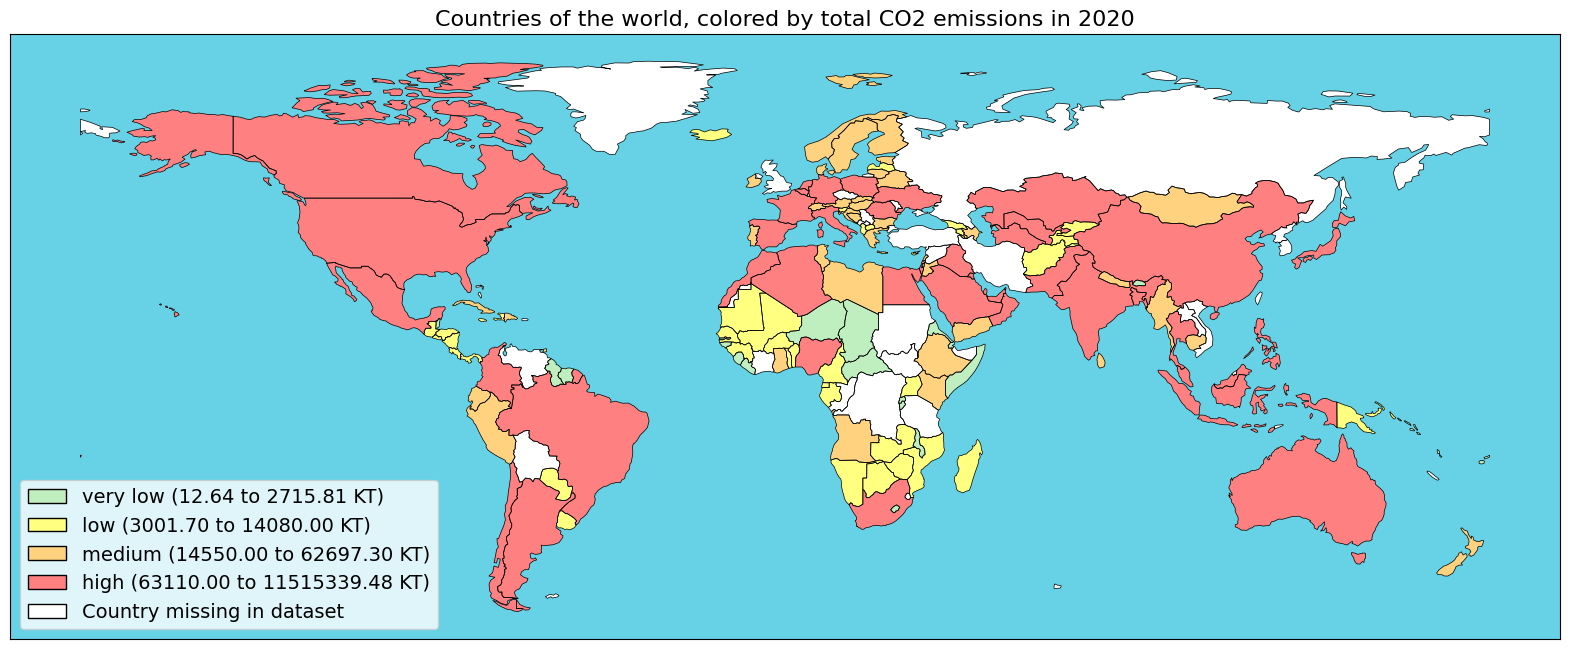

In [ ]:
plot_emissions_by_country(merge, 'Area', '2020', 'Countries of the world, colored by total CO2 emissions in 2020', 'KT')

</div><div class="map-container" id="map2">

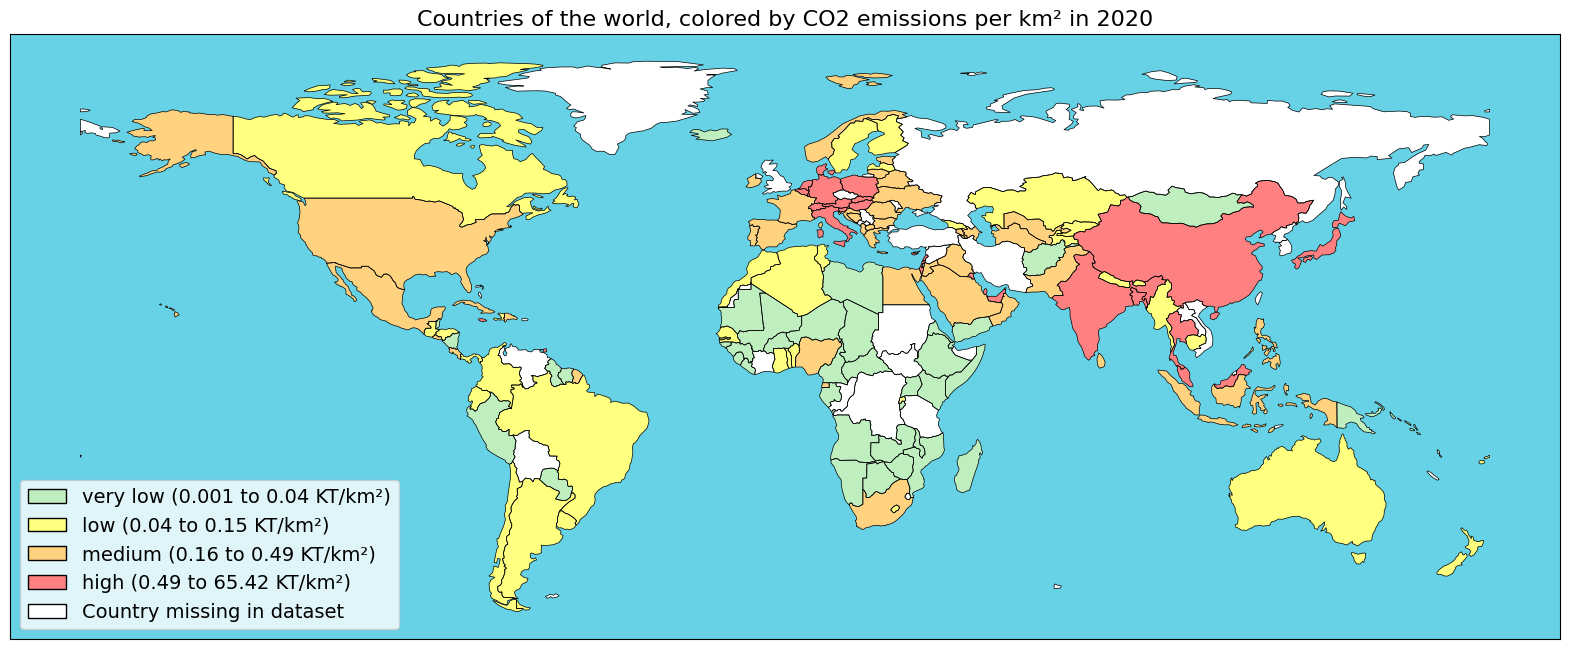

In [ ]:
plot_emissions_by_country(merge, 'Area', '2020/area', 'Countries of the world, colored by CO2 emissions per km² in 2020', 'KT/km²')

</div><div class="map-container" id="map3">

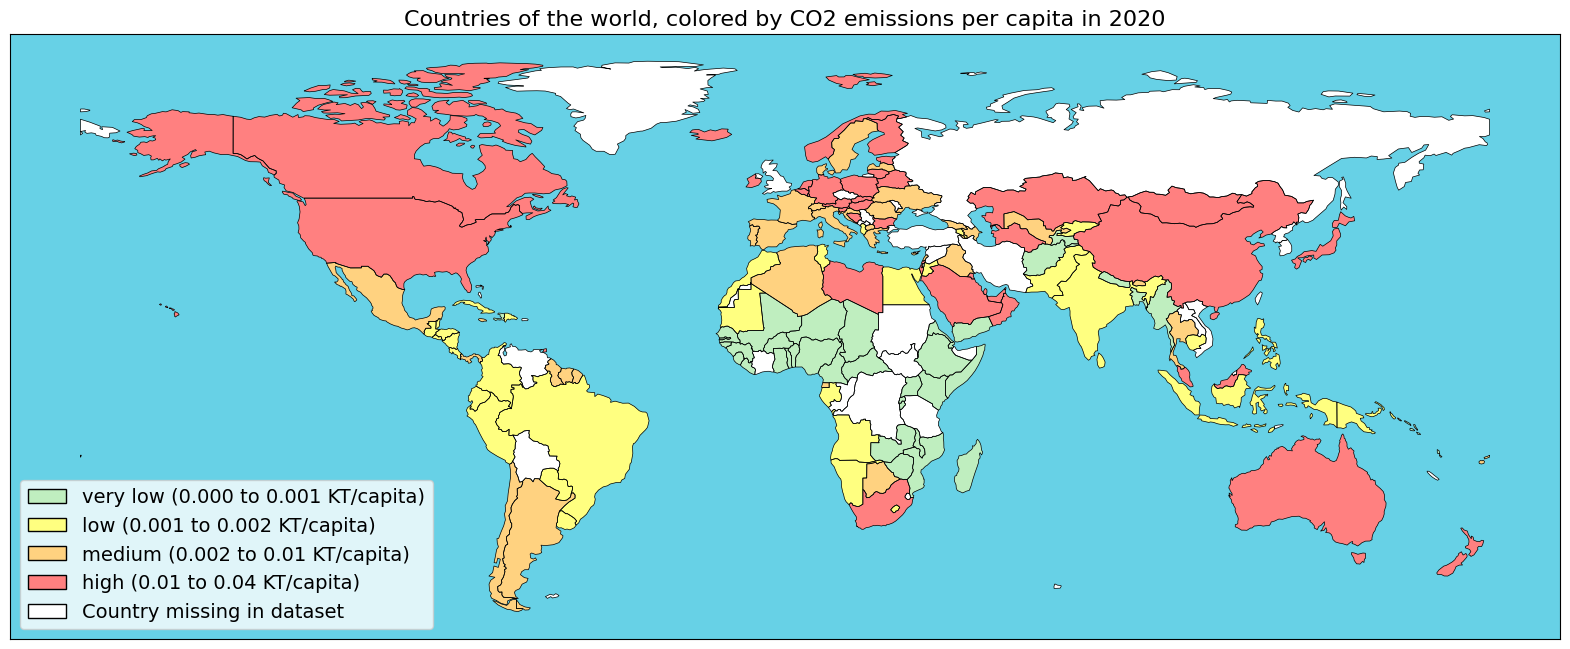

In [ ]:
plot_emissions_by_country(merge, 'Area', '2020/pop', 'Countries of the world, colored by CO2 emissions per capita in 2020', 'KT/capita')

</div>
</div>
<div class="buttons-container">
    <button onclick="switchMap('map1')">Total CO2 Emissions</button>
    <button onclick="switchMap('map2')">CO2 Emissions per Km²</button>
    <button onclick="switchMap('map3')">CO2 Emissions per Capita</button>
</div>
<br>

> *Figure 6: Shows the CO2 emissions of 2020 per country.<br>*
> *Visualized using total KT CO2, KT/KM2² and KT/Capita*

# Summary
lorem ipsum

# Bronvermelding
Zheng, Xiaoqi e.a. (2019). ”Drivers of change in Chinax2019;s energy-related CO¡sub¿2¡/sub¿
emissions”. In: Proceedings of the National Academy of Sciences 117.1, p. 29–36. doi: 10 .
1073 / pnas . 1908513117. eprint: https : / / www . pnas . org / doi / pdf / 10 . 1073 / pnas .
1908513117%7D. url: https://www.pnas.org/doi/abs/10.1073/pnas.1908513117%7D.
